In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
csv_pisa = pd.read_csv('C:/Users/Andres/Desktop/CSVs/OECD_PISA_data.csv')
csv_pisa

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...,...
2082,2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.000
2084,2084,LTU,PISASCIENCE,TOT,2018,482.000
2085,2085,LTU,PISASCIENCE,BOY,2018,479.000


In [3]:
csv_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2087 non-null   int64  
 1   LOCATION   2087 non-null   object 
 2   INDICATOR  2087 non-null   object 
 3   SUBJECT    2087 non-null   object 
 4   TIME       2087 non-null   int64  
 5   Value      2087 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 98.0+ KB


In [4]:
csv_pisa.describe()

,index,TIME,Value
count,2087.000000,2087.000000,2087.000000
mean,1043.000000,2010.814087,487.644684
std,602.609326,5.317975,38.644532
min,0.000000,2000.000000,348.000000
25%,521.500000,2006.000000,475.000000
50%,1043.000000,2012.000000,495.000000
75%,1564.500000,2015.000000,512.000000
max,2086.000000,2018.000000,574.000000


In [5]:
keyword = 'TOT'
csv_pisa_keyword = csv_pisa[~csv_pisa['SUBJECT'].str.contains(keyword, case=False)]
count_by_location = csv_pisa_keyword['LOCATION'].value_counts()
count_df = pd.DataFrame(count_by_location.reset_index())
count_df.columns = ['LOCATION', 'Count']
count_df

,LOCATION,Count
0,AUS,36
1,JPN,36
2,SWE,36
3,BRA,36
4,IDN,36
5,PRT,36
6,POL,36
7,NOR,36
8,NZL,36
9,OAVG,36


In [6]:
sum_count_df = count_df['Count'].sum()
sum_count_df

1386

In [7]:
!pip install pycountry
import pycountry

In [8]:
count_df['Country_Name'] = count_df['LOCATION'].apply(lambda x: pycountry.countries.get(alpha_3=x).name if pycountry.countries.get(alpha_3=x) else x)
count_df

,LOCATION,Count,Country_Name
0,AUS,36,Australia
1,JPN,36,Japan
2,SWE,36,Sweden
3,BRA,36,Brazil
4,IDN,36,Indonesia
5,PRT,36,Portugal
6,POL,36,Poland
7,NOR,36,Norway
8,NZL,36,New Zealand
9,OAVG,36,OAVG


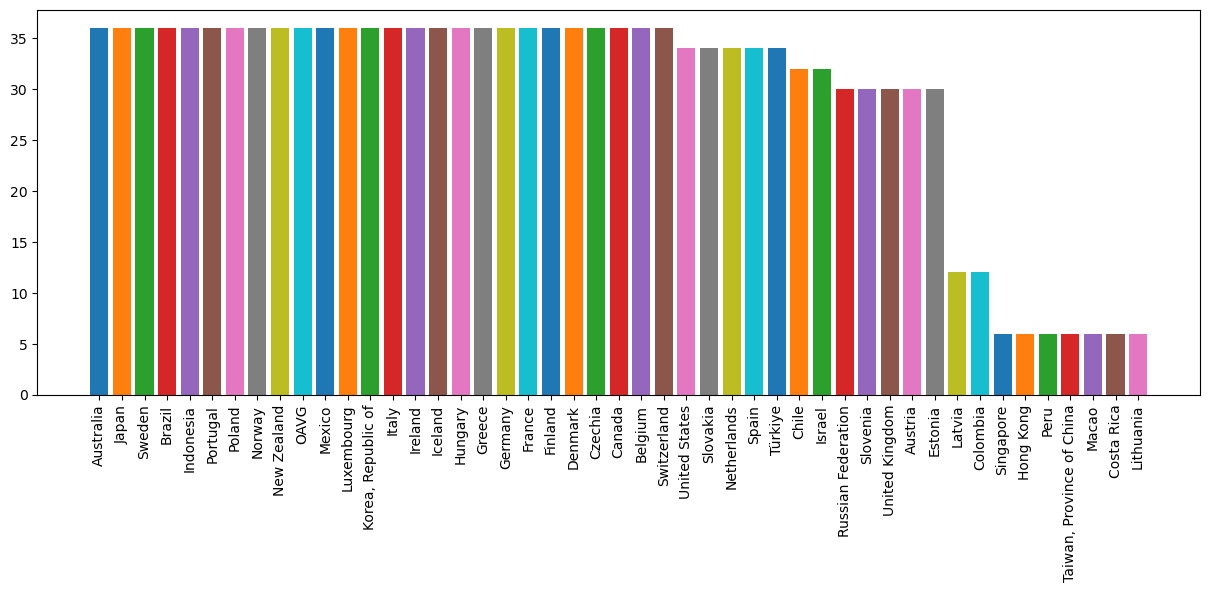

In [9]:
plt.figure(figsize=(15,5))
colors = sb.color_palette()
plt.bar(count_df['Country_Name'], count_df['Count'], color=colors)
plt.xticks(rotation=90)
plt.show()

In [10]:
count_by_subject = csv_pisa_keyword['SUBJECT'].value_counts()
count_subject = pd.DataFrame(count_by_subject.reset_index())
count_subject.columns = ['SUBJECT', 'Count']
count_subject

,SUBJECT,Count
0,BOY,693
1,GIRL,693


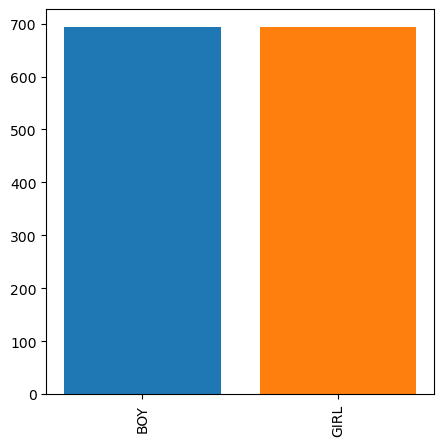

In [11]:
plt.figure(figsize=(5,5))
colors = sb.color_palette()
plt.bar(count_subject['SUBJECT'], count_subject['Count'], color=colors)
plt.xticks(rotation=90)
plt.show()

In [16]:
count_by_subject_country = csv_pisa_keyword[csv_pisa_keyword['SUBJECT'].isin(['BOY', 'GIRL'])]
results = count_by_subject_country.groupby(['LOCATION', 'SUBJECT']).size().unstack(fill_value=0).reset_index()

results.columns.name = None
results.columns = ['LOCATION', 'GIRL', 'BOY']